In [1]:
import sensus
import numpy as np
import os
import json
from matplotlib import pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [2]:
workdirs_path = os.path.join(sensus.__path__[0], 'work_dirs')

In [4]:
models_dict = {
    'PointPillars_Infrastructure': {
        'name': 'pointpillars_hv_secfpn_8xb6-160e_dair-infrastructure-3d-3class',
        'data': '20240226_182316'
    },
    'PointPillars_Vehicle': {
        'name': 'pointpillars_hv_secfpn_8xb6-160e_dair-vehicle-3d-3class',
        'data': '20240227_021429'
    },
    'Second_Infrastructure': {
        'name': 'second_hv_secfpn_8xb6-80e_dair-infrastructure-3class',
        'data': '20240224_014749'
    },
    'Second_Vehicle': {
        'name': 'second_hv_secfpn_8xb6-80e_dair-vehicle-lidar-reduced-3class',
        'data': '20240227_112505'
    },
    'PV-RCNN_Infrastructure': {
        'name': 'pv_rcnn_8xb2-80e_dair-infrastructure-3d-3class',
        'data': '20240307_211314'
    },
}

In [5]:
# scalars_path = 'pointpillars_hv_secfpn_8xb6-160e_dair-vehicle-3d-3class/20240227_021429/vis_data/scalars.json'
def load_scalars_json(json_path):
    data = []
    with open(json_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

In [6]:
def get_data_from_json(data, metrics_names):
    metrics_dict = {metric: [] for metric in metrics_names}
    metrics_dict['epoch'] = []
    for i in range(len(data)):
        eval = False
        for key in data[i].keys():
            if key in metrics_names:
                eval = True
                metrics_dict[key].append(data[i][key])
        if eval:
            metrics_dict['epoch'].append(data[i]['step'])
    return metrics_dict

In [8]:
metrics_names = ['Kitti metric/pred_instances_3d/KITTI/Pedestrian_3D_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Pedestrian_BEV_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Pedestrian_3D_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Pedestrian_BEV_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Cyclist_3D_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Cyclist_BEV_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Cyclist_3D_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Cyclist_BEV_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Car_BEV_AP40_moderate_strict',
    'Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Car_BEV_AP40_moderate_loose',
    'Kitti metric/pred_instances_3d/KITTI/Overall_3D_AP40_moderate',
    'Kitti metric/pred_instances_3d/KITTI/Overall_BEV_AP40_moderate']

In [9]:
for key in models_dict.keys():
    json_path = os.path.join(workdirs_path, 
        models_dict[key]['name'], 
        models_dict[key]['data'], 'vis_data', 'scalars.json')
    data = load_scalars_json(json_path)
    models_dict[key]['metrics'] = get_data_from_json(data, metrics_names)

In [ ]:
models_dict

In [10]:
models_names = list(models_dict.keys())
models_names

['PointPillars_Infrastructure',
 'PointPillars_Vehicle',
 'Second_Infrastructure',
 'Second_Vehicle',
 'PV-RCNN_Infrastructure']

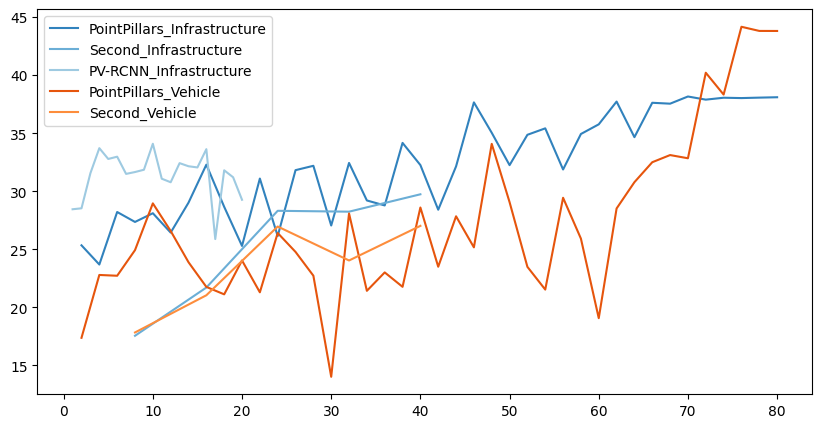

In [11]:
plt.figure(figsize=(10, 5))
i = 0
for key in models_dict.keys():
    if 'Infrastructure' in key:
        # Plot using 'tab_20c' colormap starting from the 5th color
        plt.plot(models_dict[key]['metrics']['epoch'], 
            models_dict[key]['metrics']['Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict'], 
            label=key, color=plt.cm.tab20c(i + 0))
        i += 1

i = 0
for key in models_dict.keys():
    if 'Vehicle' in key:
        # Plot using 'tab_20c' colormap starting from the 5th color
        plt.plot(models_dict[key]['metrics']['epoch'], 
            models_dict[key]['metrics']['Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict'], 
            label=key, color=plt.cm.tab20c(i + 4))
        i += 1

plt.legend()

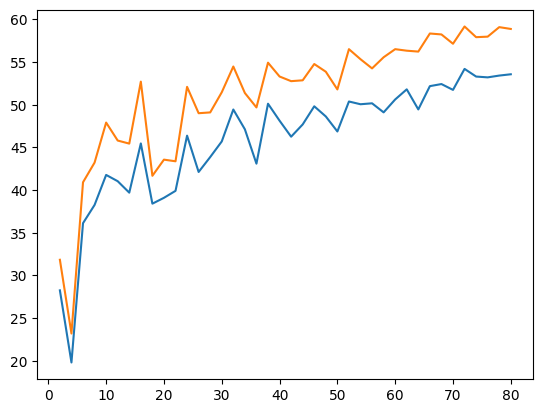

In [8]:
# plot the first two metrics in metrics_dict
for metric in metrics_names[:2]:
    plt.plot(metrics_dict['epoch'], metrics_dict[metric], label=metric)

In [58]:
metrics_names

['Kitti metric/pred_instances_3d/KITTI/Pedestrian_3D_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Pedestrian_BEV_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Pedestrian_3D_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Pedestrian_BEV_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Cyclist_3D_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Cyclist_BEV_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Cyclist_3D_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Cyclist_BEV_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Car_BEV_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Car_BEV_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Overall_3D_AP40_moderate',
 'Kitti metric/pred_instances_3d/KITTI/Overall_BEV_AP40_modera

In [11]:
metrics_names

['Kitti metric/pred_instances_3d/KITTI/Pedestrian_3D_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Pedestrian_BEV_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Pedestrian_3D_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Pedestrian_BEV_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Cyclist_3D_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Cyclist_BEV_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Cyclist_3D_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Cyclist_BEV_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Car_BEV_AP40_moderate_strict',
 'Kitti metric/pred_instances_3d/KITTI/Car_3D_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Car_BEV_AP40_moderate_loose',
 'Kitti metric/pred_instances_3d/KITTI/Overall_3D_AP40_moderate',
 'Kitti metric/pred_instances_3d/KITTI/Overall_BEV_AP40_modera